In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2
from proj1_code.utils import *
from proj1_code.part1 import *
from proj1_unit_tests.test_part1 import *

def show_image(image):
    cv2.imshow('image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

opencv read test

In [3]:
image = load_image('data/1a_dog.bmp')
li_image = np.array([
    [0,1,2],
    [3,4,5],
])
lit_image = np.array([
    [0,1,2,3],
    [4,5,6,7],
    [8,9,10,11],
])
lito_image = np.array([
    [0,1,2,3],
    [4,5,6,7],
    [8,9,10,11],
    [12,13,14,15]
])

In [4]:
def conv_test(img, kernel):
    result = np.zeros(img.shape)
    krows, kcols = kernel.shape
    padY = kernel.shape[0] // 2
    padX = kernel.shape[1] // 2
    padded_image = cv2.copyMakeBorder(img, padY, padY, padX, padX, cv2.BORDER_CONSTANT)
    print(padded_image)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            print('position: ', i,j)
            #print(kernel,'\n*')
            print(padded_image[i: i + krows, j: j + kcols], '\n=')
            #print(kernel * padded_image[i: i + krows, j: j + kcols],'\n')

In [9]:
kernel = np.array([[1],[1],[1]])
# print(kernel.shape[0], kernel.shape[0] // 2)
# print(kernel.shape[1], kernel.shape[1] // 2)
#fila, columna = lit_image.shape
# conv_test(lit_image, kernel)

### Identity filter

In [6]:
filter = np.array(
    [
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]
    ]
)

channel_img = np.array(
    [
        [0, 1, 2, 3],
        [4, 5, 6, 7],
        [8, 9, 10, 11],
        [12, 13, 14, 15]
    ]
)

img = np.zeros((4, 4, 3), dtype=np.uint8)
img[:, :, 0] = channel_img
img[:, :, 1] = channel_img
img[:, :, 2] = channel_img
filtered_img = my_conv2d_numpy(copy.deepcopy(img), filter)
# filtered_img

### Ones filter

In [7]:
filter = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],])

channel_img = np.array([
    [0, 1],
    [2, 3]])

img = np.zeros((2, 2, 3), dtype=np.uint8)
for i in range(3):
    img[:, :, i] = channel_img

filtered_img = my_conv2d_numpy(img, filter)
# filtered_img

### Non square filter

In [8]:
filt = np.array([[1,1,1]])
channel_img = np.array([[0, 1, 3], [4, 5, 6]])
img = np.zeros((2,3,3), dtype=np.uint8)
for i in range(3):
    img[:,:,i] = channel_img

filtered_img = my_conv2d_numpy(img, filt)
filtered_img[:,:,0]

array([[ 1.,  4.,  4.],
       [ 9., 15., 11.]])

In [9]:
gt_filtered_channel_img = np.array([[1, 4, 4],[9, 15, 11]])
gt_filtered_img = np.zeros((2, 3, 3), dtype=np.uint8)
for i in range(3):
    gt_filtered_img[:, :, i] = gt_filtered_channel_img
    
gt_filtered_img

array([[[ 1,  1,  1],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[ 9,  9,  9],
        [15, 15, 15],
        [11, 11, 11]]], dtype=uint8)

### Hibrid image

In [5]:
kernel = create_Gaussian_kernel_2D(7)
image1 = load_image('data/1a_dog.bmp')
image2 = load_image('data/1b_cat.bmp')
low, high, hybrid_image = create_hybrid_image(image1, image2, kernel)

img_h, img_w, _ = image2.shape
k_h, k_w = kernel.shape
# Exclude the border pixels.
hybrid_interior = hybrid_image[k_h:img_h-k_h, k_w:img_w-k_w]

In [8]:
# high
# low
# hybrid_image.shape

In [3]:
print(np.allclose(158339.52, hybrid_interior.sum()))
print(hybrid_interior.sum())

True
158339.4946953352


In [4]:
gt_hybrid_crop = np.array(
    [
        [[0.5429589 , 0.55373234, 0.5452099 ],
        [0.5290553 , 0.5485607 , 0.545738  ]],

        [[0.55020595, 0.55713284, 0.5457024 ],
        [0.5368045 , 0.5603536 , 0.5505791 ]]
    ], dtype=np.float32
)
np.allclose(hybrid_image[100:102,100:102,:], gt_hybrid_crop, atol=1e-3)

True

In [29]:
image1 = load_image('data/5a_submarine.bmp')
image2 = load_image('data/5b_fish.bmp')

In [30]:
from proj1_code.utils import vis_image_scales_numpy
from proj1_unit_tests.test_part1 import test_hybrid_image_np

low_frequencies, high_frequencies, hybrid_image = create_hybrid_image(image1, image2, kernel)

vis = vis_image_scales_numpy(hybrid_image)

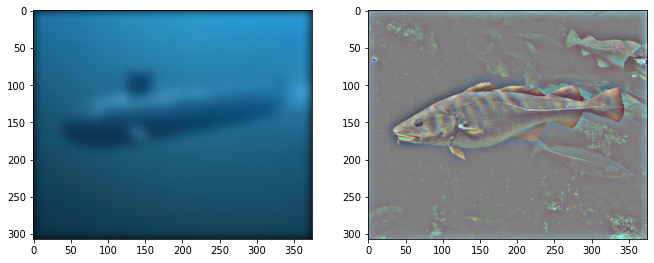

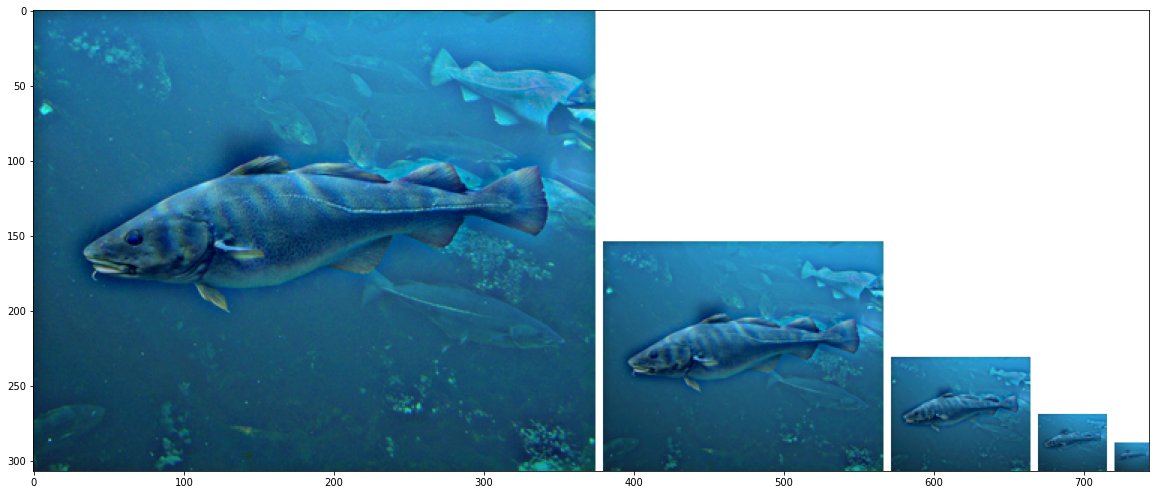

In [31]:
plt.figure(figsize=(11,6));
plt.subplot(1,2,1); plt.imshow((low_frequencies*255).astype(np.uint8));
plt.subplot(1,2,2); plt.imshow(((high_frequencies+0.5)*255).astype(np.uint8));
plt.figure(figsize=(20, 20)); plt.imshow(vis);

In [32]:
# save_image('../results/part1/low_frequencies.jpg', low_frequencies)
# save_image('../results/part1/high_frequencies.jpg', high_frequencies+0.5)
save_image('my_results/part1/hybrid_image_submarine.jpg', hybrid_image)
# save_image('../results/part1/hybrid_image_scales.jpg', vis)